# TASK 5: Credit Card Fraud Detection

## Task Description:

- Build a machine learning model to identify fraudulent credit card transactions.
- Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
- Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
- Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

## Context:

Credit card companies aim to detect fraudulent transactions to prevent customers from being charged for unauthorized purchases.

## About the Dataset:

- The Credit Card Fraud Detection dataset [link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) comprises credit card transactions made by European cardholders in September 2013. 
- It covers two days, featuring 492 frauds out of 284,807 transactions. Notably, the dataset is highly unbalanced, with fraudulent transactions accounting for only 0.172% of all transactions.
- This dataset exclusively includes numerical input variables resulting from a PCA transformation. Due to confidentiality constraints, the original features and additional background information aren't provided. 
- The features V1 through V28 represent principal components obtained via PCA. However, 'Time' and 'Amount' are the only features not subjected to PCA.
    - 'Time' indicates the seconds elapsed between each transaction and the first recorded transaction.
    - 'Amount' signifies the transaction amount, potentially useful for example-dependent cost-sensitive learning.
    - 'Class' represents the response variable, assuming a value of 1 for fraud and 0 otherwise.

## Abstract:

- Time, Amount and Class data are in normal format which has the data accordingly.
- Remaining columns has column names as v1, v2,...etc which hides its identity.
- From the observation and given context about dataset, it is mentioned that dataset is applied PCA transformation.
- It covers two days, featuring 492 frauds out of 284,807 transactions. Notably, the dataset is highly unbalanced.
- This dataset exclusively includes numerical input variables resulting from a PCA transformation. Due to confidentiality constraints.
- 'Class' represents the response variable, assuming a value of 1 for fraudulent and 0 otherwise.
- Potentially useful for example-dependent cost-sensitive learning.
- Considering the class imbalance ratio, it's advisable to evaluate accuracy using the Area Under the Precision-Recall Curve (AUPRC) and ROC-AUC Curve to explain model goodness of fit.
- Evaluate the model's performance using metrics like precision, recall, and F1-score.
- Accuracy metrics derived from a confusion matrix may not hold significance for unbalanced classification problems.

## Importing all the necessary libraries

In [1]:
import pandas as pd # Import Pandas for data manipulation and analysis
import numpy as np # Import NumPy for numerical operations
import seaborn as sns # Import Seaborn for enhanced data visualization
import matplotlib.pyplot as plt # Import Matplotlib for basic data visualization

# Import Warnings to manage or ignore warning messages in the code
import warnings 
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

In [2]:
# load the data from csv file to Pandas DataFrame

ccfd_df = pd.read_csv(r'C:\Users\sanja\OneDrive\Desktop\CODSOFT\TASK 5_ Credit Card Fraud Detection\creditcard.csv')

In [4]:
# Function to check number of rows and columns of dataset, number of missing values in each column,
# glimpse of the dataframe, statistical and important information about the dataset 

def analysis(data):
    print(f'Data Size  : {data.size}')
    print(f'\nShape of the dataframe: {data.shape[0]} rows and {data.shape[1]} columns')
    print("*" * 100)
    print("\nDisplaying the initial records of the dataset:")
    display(data.head())
    print("*" * 100)
    print("\nStatistical measures about the data:")
    display(data.describe())
    print("*" * 100)
    print("\nSome important information about the dataframe:\n")
    display(data.info())
    print("*" * 110)
            
data = ccfd_df
analysis(ccfd_df)

Data Size  : 8829017

Shape of the dataframe: 284807 rows and 31 columns
****************************************************************************************************

Displaying the initial records of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


****************************************************************************************************

Statistical measures about the data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


****************************************************************************************************

Some important information about the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284

None

**************************************************************************************************************


##### We can see that this dataset has 284,807 records, 31 columns, all of which contain numerical values. The last column ('class') determines whether a transaction is fraudulent or not.

In [5]:
#Checking the total number of Fraudulent and Non-Fraudulent transactions
fraud = ccfd_df[ccfd_df['Class'] == 1]
non_fraud = ccfd_df[ccfd_df['Class'] == 0]

print('Fraudulent Cases: {}'.format(len(ccfd_df[ccfd_df['Class'] == 1])))
print('Fraudulent Cases Percentage: {}'.format(round(ccfd_df['Class'].value_counts()[1]/len(ccfd_df) * 100,2)),'%')

print('******************************************')

print('Non-Fraudulent Transactions: {}'.format(len(ccfd_df[ccfd_df['Class'] == 0]))) 
print('Non-Fraudulent Transactions Percentage: {}'.format(round(ccfd_df['Class'].value_counts()[0]/len(ccfd_df) * 100,2)),'%')

Fraudulent Cases: 492
Fraudulent Cases Percentage: 0.17 %
******************************************
Non-Fraudulent Transactions: 284315
Non-Fraudulent Transactions Percentage: 99.83 %


In [6]:
# Amount details of the fraudulent transaction
fraud_amount = fraud.Amount.describe()
fraud_amount

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
#details of Non-Fraudulent transaction
non_fraud_amount= non_fraud.Amount.describe()
non_fraud_amount

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
#details of both Fraudulent and Non-Fraudulent transaction amount
Trans_Amount = pd.concat([fraud_amount, non_fraud_amount], axis=1)
Trans_Amount.columns.values[0] = "Fraudulent_amount"
Trans_Amount.columns.values[1] = "Non-Fraudulent_amount"
Trans_Amount

,Fraudulent_amount,Non-Fraudulent_amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [9]:
#details of both Fraudulent and Non-Fraudulent transaction time
fraud_time = fraud.Time.describe()
non_fraud_time = non_fraud.Time.describe()
Trans_time = pd.concat([fraud_time, non_fraud_time], axis=1)
Trans_time.columns.values[0] = "Fraudulent_time"
Trans_time.columns.values[1] = "Non-Fraudulent_time"
Trans_time

,Fraudulent_time,Non-Fraudulent_time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


## Data Visualization

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by runing the code locally for full interactivity or try loading this page with nbviewer.org

#### Plotting the distribution of all numerical features

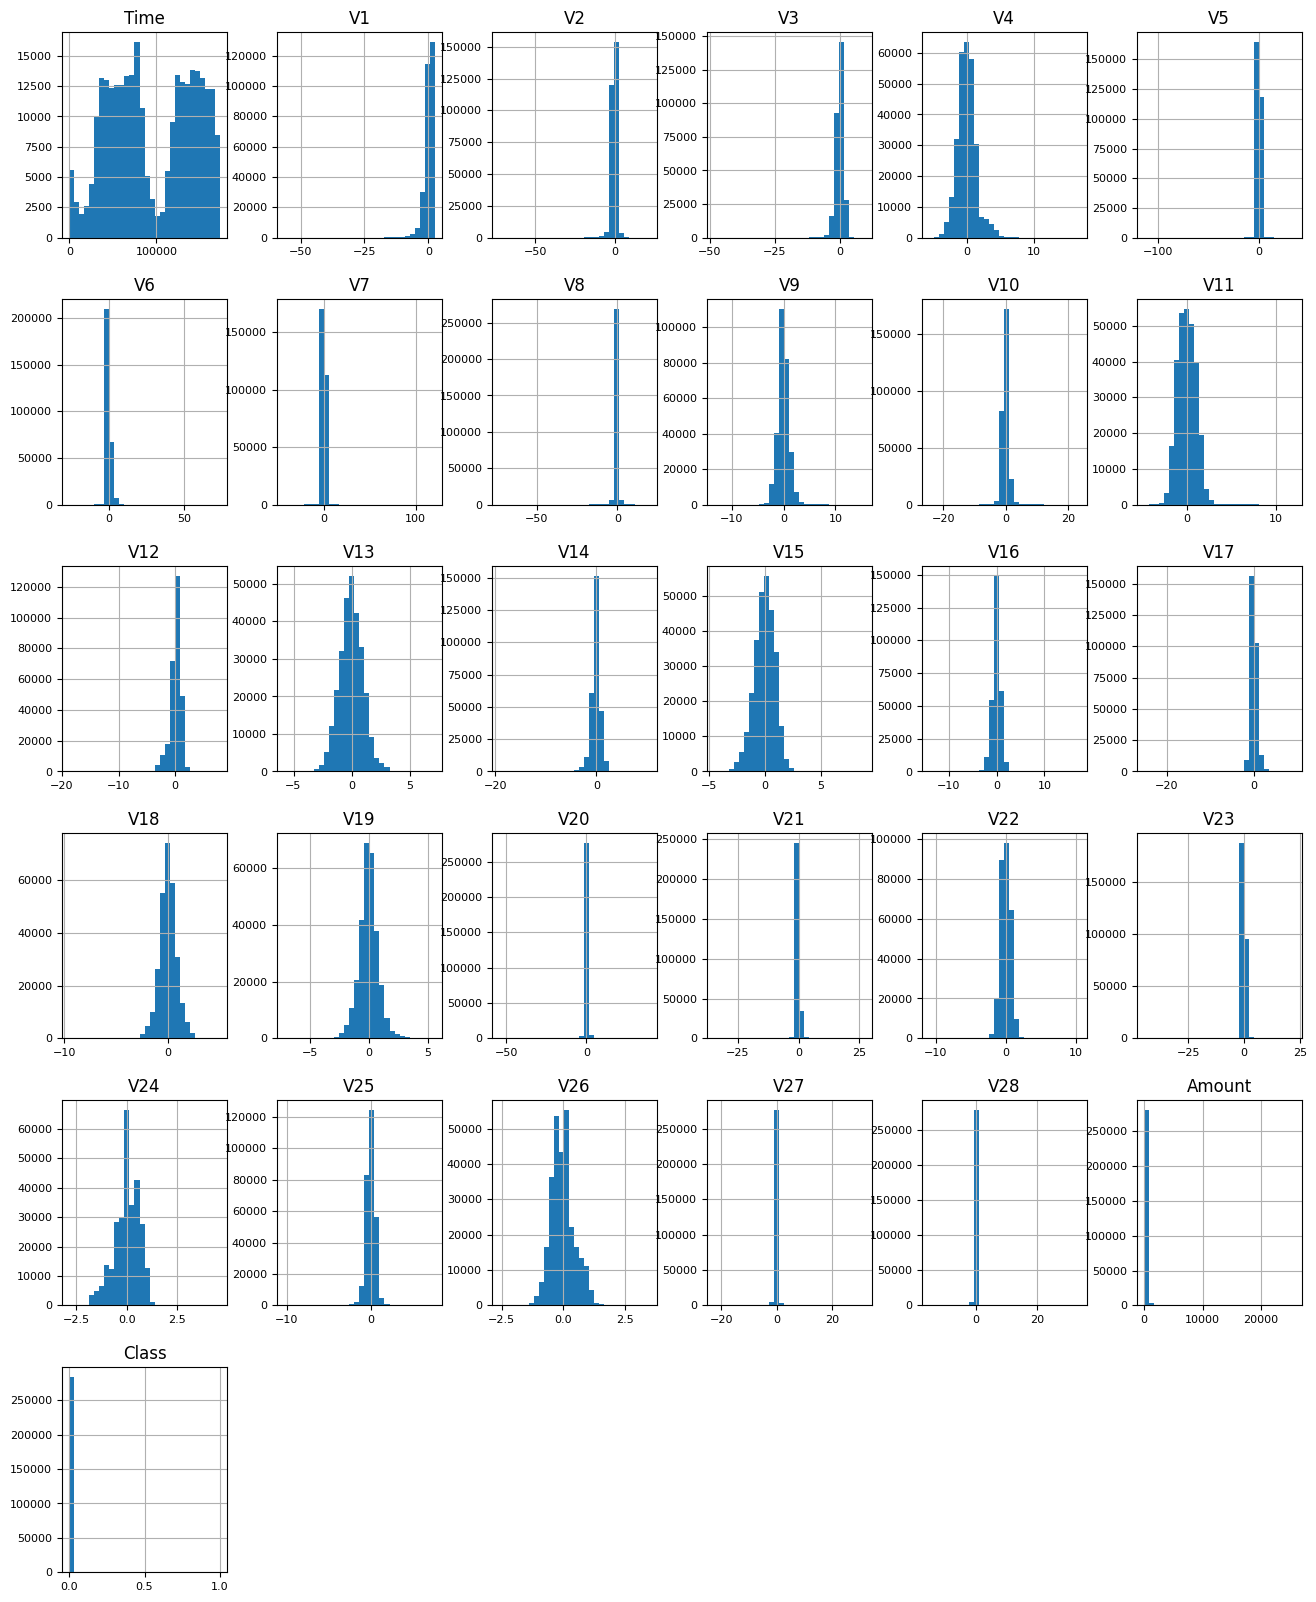

In [10]:
ccfd_df.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8);

##### Plotting Distribution of Transaction Amount and Transaction Time

(0.0, 172792.0)

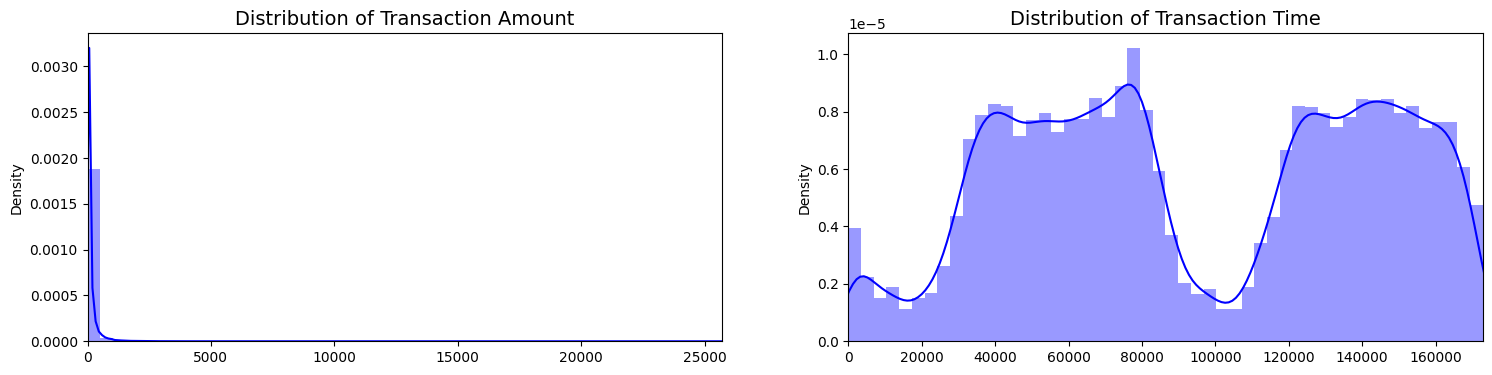

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = ccfd_df['Amount'].values
time_val = ccfd_df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

#### Visualizing the class distribution in percentage

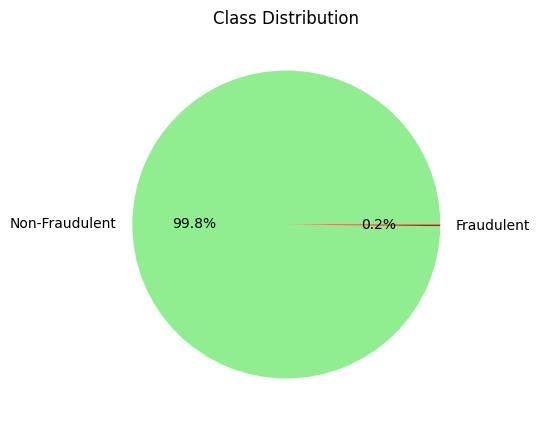

In [12]:
class_counts = ccfd_df["Class"].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_counts, autopct='%1.1f%%', colors=['lightgreen', 'red'], labels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Class Distribution')
plt.show()

##### Plotting Value Counts of 'Class' Column

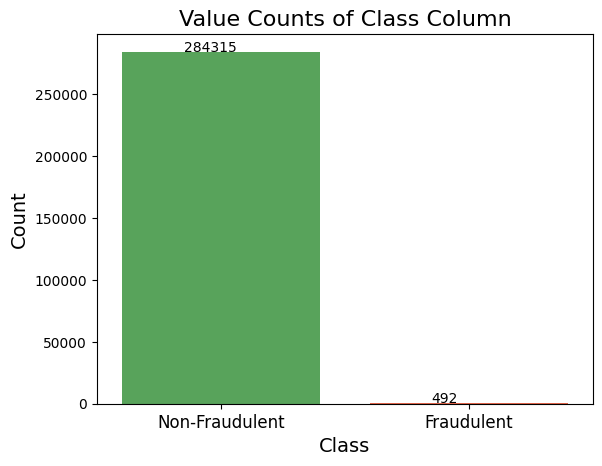

In [13]:
def plot_value_counts(ccfd_df, column):
    # Use Seaborn's countplot to visualize the value counts of the specified column
    ax = sns.countplot(data=ccfd_df, x=column, palette=['#4CAF50', '#FF5733'])

    # Add data labels above each bar
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

    # Add title and axis labels
    plt.title(f"Value Counts of {column} Column", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Count", fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], fontsize=12)
    
    # Display the plot
    plt.show()

# Passing our DataFrame
plot_value_counts(ccfd_df, "Class")

### Correlation Matrix

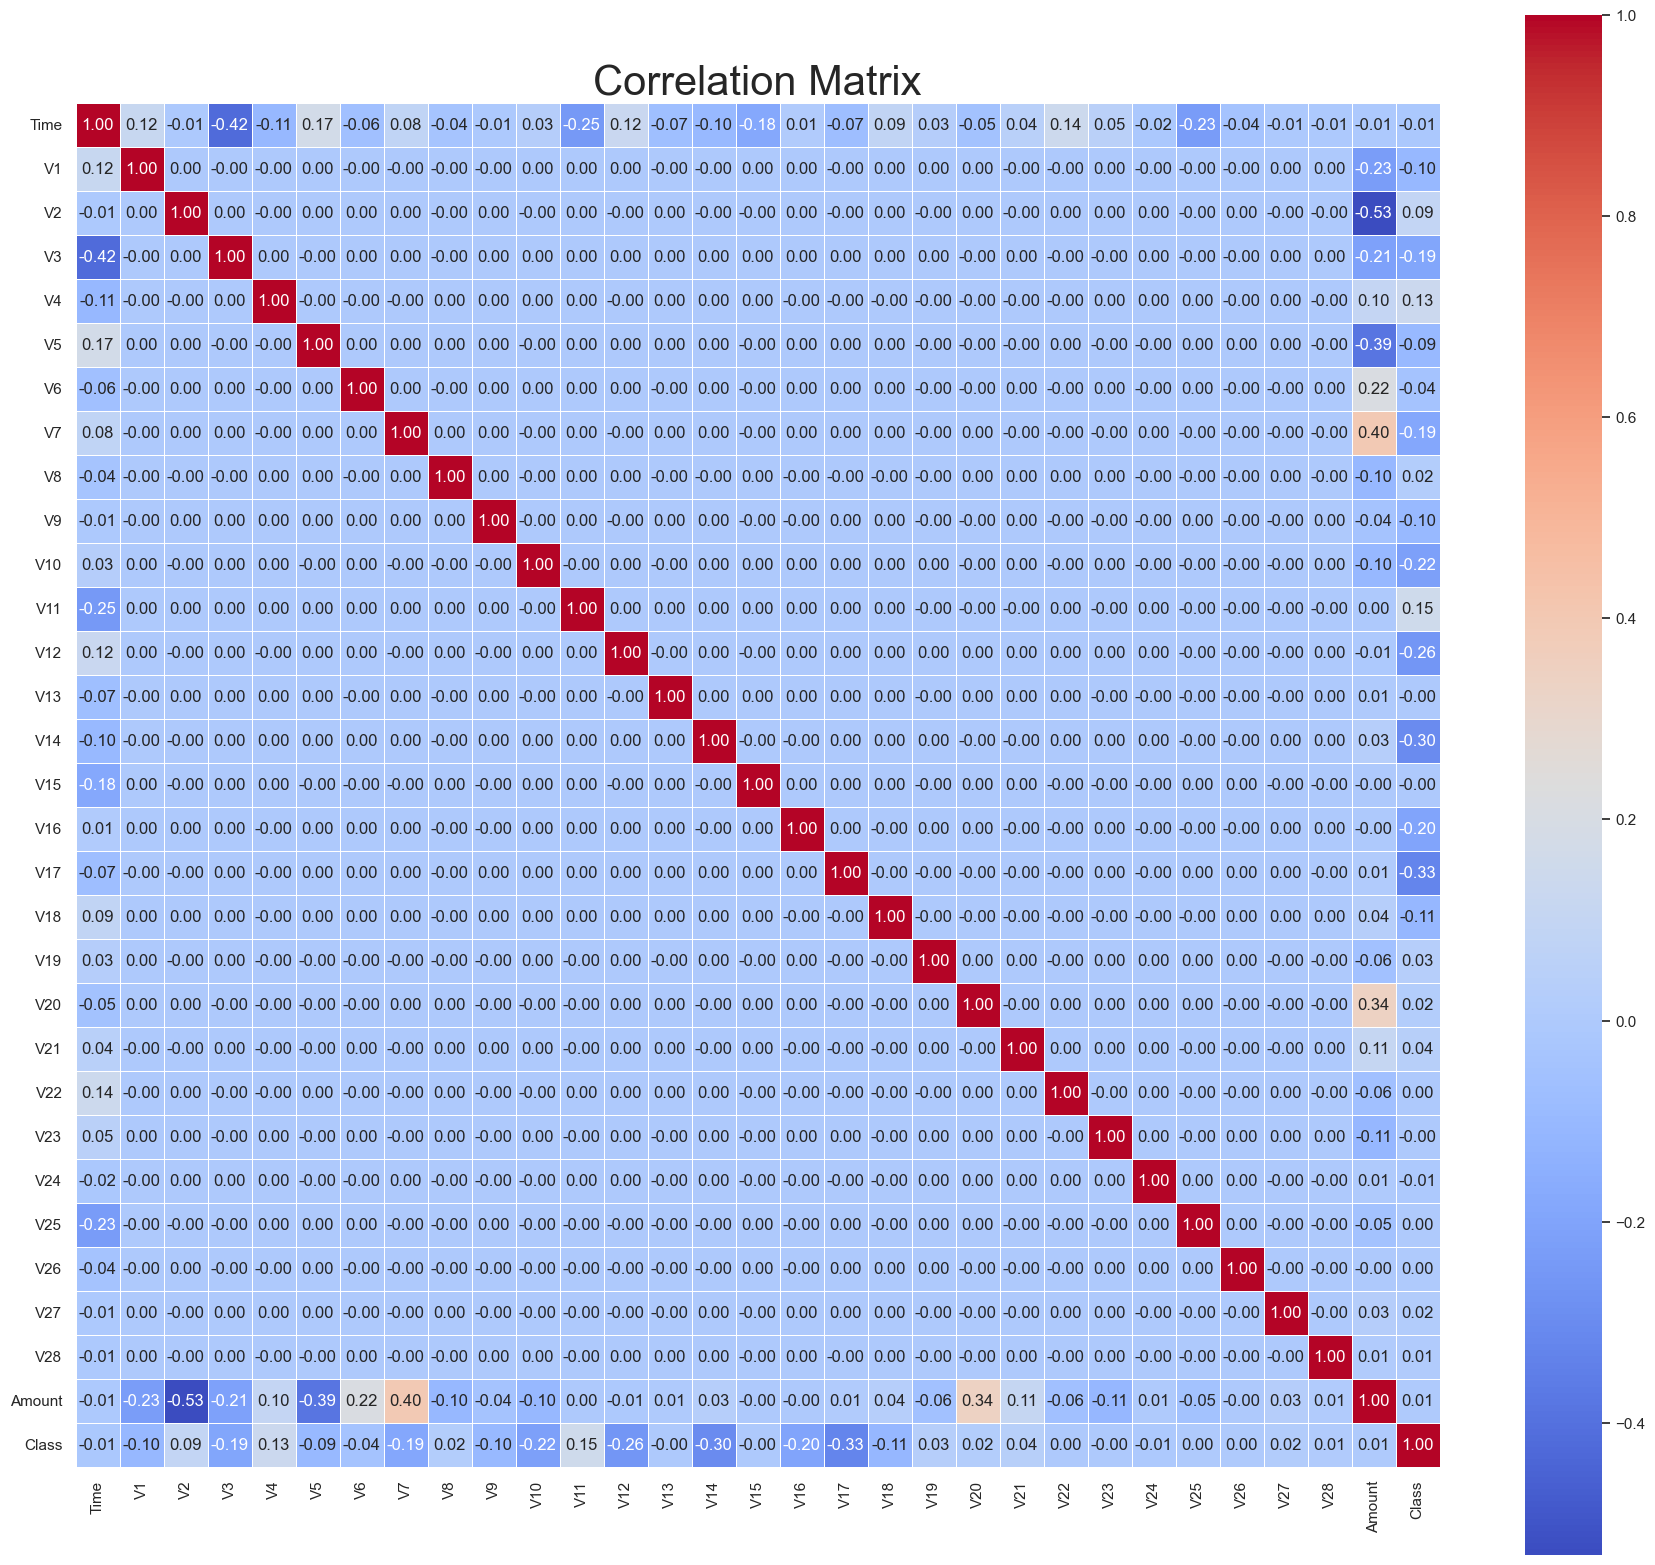

In [14]:
# Set the style for the plot
sns.set(style="white")
plt.figure(figsize=(22, 20))

# Calculate correlation matrix
corr_matrix = ccfd_df.corr()

# Create a heatmap with coolwarm color map
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, square=True)

# Set plot title
plt.title("Correlation Matrix", fontsize=30)

# Display the plot
plt.show()

## Data Preprocessing

#### Data Preprocessing: Checking for null values in the dataset

In [15]:
print(f'\nMissing values in each column: \n{ccfd_df.isnull().sum()} ')
print("")
print(f'Total missing values in the dataframe: {ccfd_df.isnull().sum().sum()} ')
print("*" * 110)


Missing values in each column: 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64 

Total missing values in the dataframe: 0 
**************************************************************************************************************


##### As we can see, there are no null values in the dataset, which is great.

#### Data Preprocessing: Split the data into features and target variable

In [16]:
# Split the data into independent variable(X) and dependent variable(y)
X = ccfd_df.drop(['Class'], axis=1)
y = ccfd_df[['Class']]

In [17]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [18]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


#### Data Preprocessing: Normalising the data

In [19]:
# Feature Scaling (X) using Standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['Amount', 'Time']] = sc.fit_transform(X[['Amount', 'Time']])
pd.DataFrame(X).head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


#### Data Preprocessing: Checking dependent variable(y) imbalance issues

In [20]:
# Check imbalance dataset
y.value_counts()

Class
0        284315
1           492
Name: count, dtype: int64

- Data is not balanced, if you see class 0 has legit transactions of 284315, where as class 1 represents fraudulent transations of 492
- So we have to use the Resampling technique

#### Data Preprocessing:  Handling imbalance data by UnderSampling technique

- Randomly removes instances from the majority class to balance the class distribution.
- Creates the dataset count based on classifications with equal rows

In [21]:
#Balancing the dataset using UnderSampling technique
from imblearn.under_sampling import RandomUnderSampler
resampled_df = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = resampled_df.fit_resample(X,y)

In [22]:
print("Actual Dataset Count: ", y.value_counts())
print("*"*100)
print("After UnderSampling Method: ", y_resampled.value_counts())
print("*"*100)

Actual Dataset Count:  Class
0        284315
1           492
Name: count, dtype: int64
****************************************************************************************************
After UnderSampling Method:  Class
0        492
1        492
Name: count, dtype: int64
****************************************************************************************************


#### Data Preprocessing: Plotting Balanced Classes with resampled data

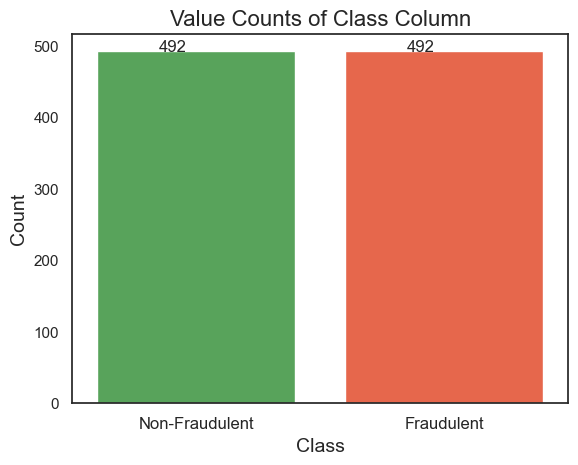

In [23]:
# Plotting the value counts of the "Class" column in the resampled 'Class' DataFrame
plot_value_counts(y_resampled, "Class")

#### Data Preprocessing: Plotting Distribution of Features by Class after Resampling

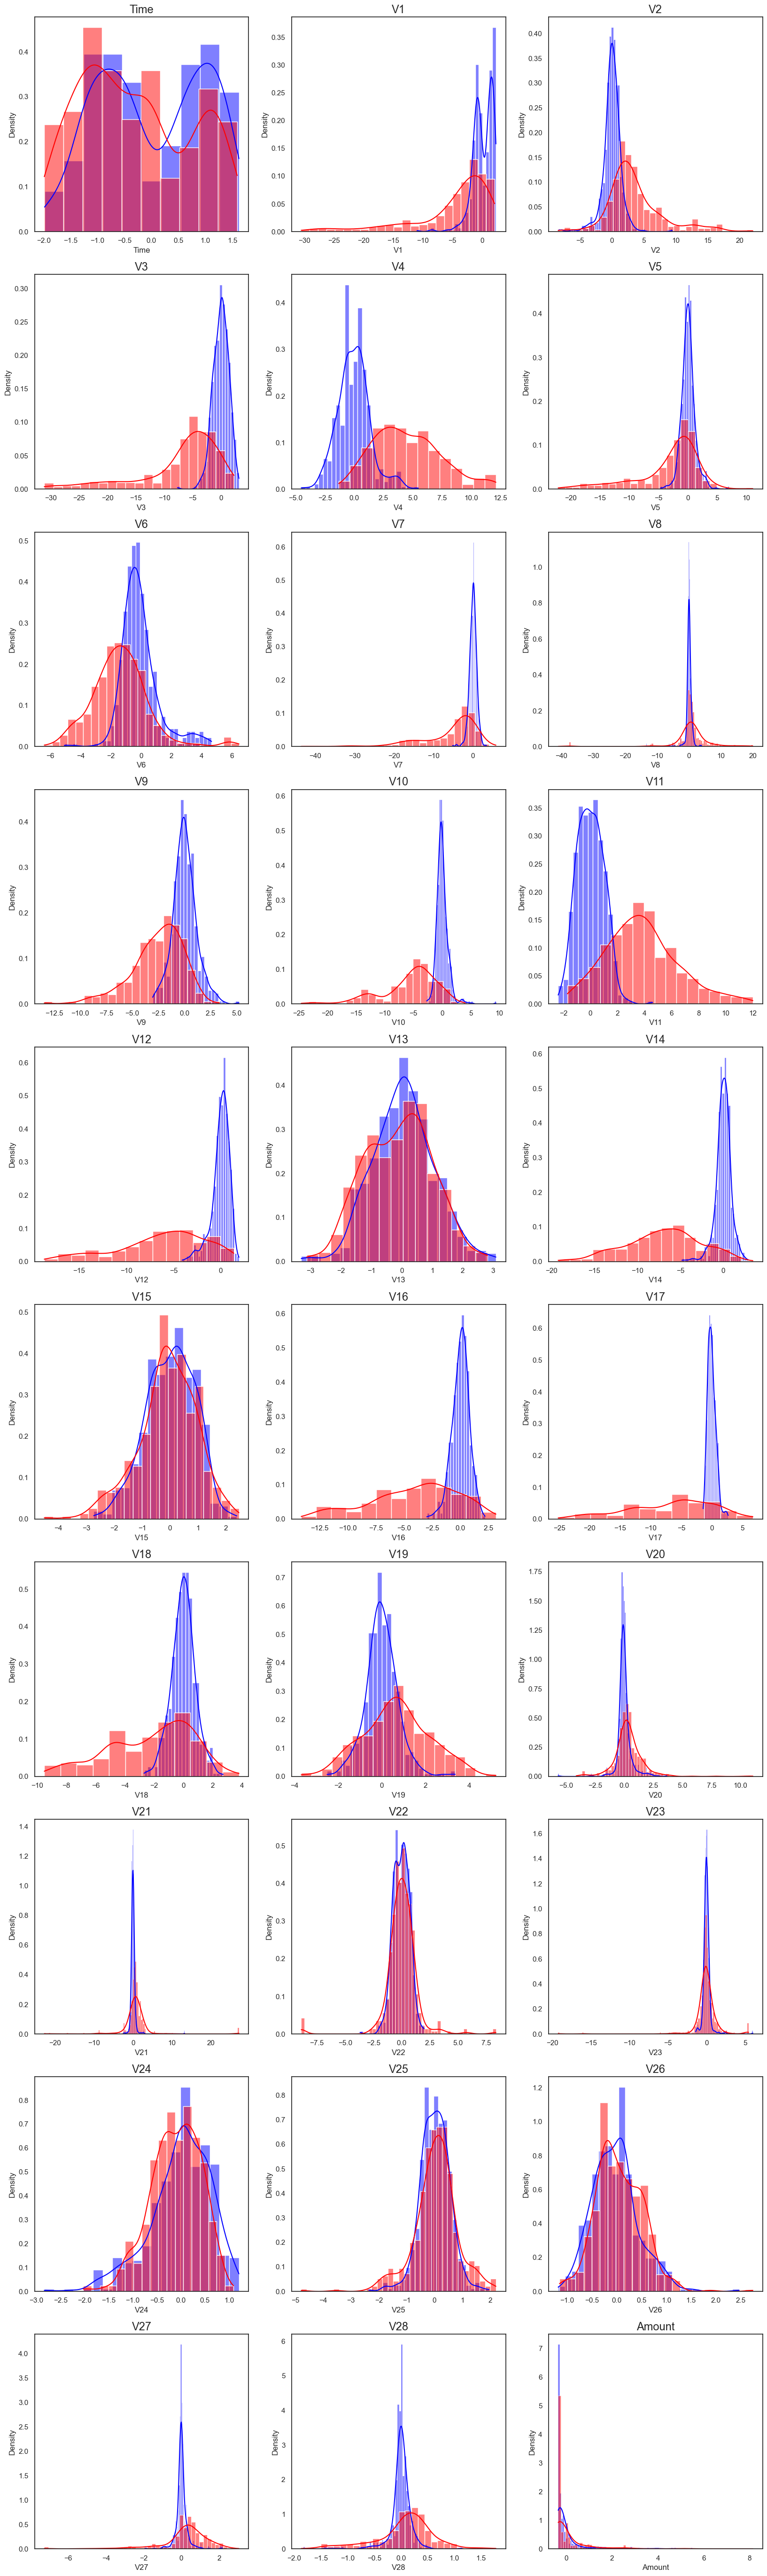

In [24]:
#accumulating all the column names 
cols = list(X_resampled.columns.values)

#plotting the data after resampling
nonfraud_trans = y_resampled.Class==0
fraud_trans = y_resampled.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(X_resampled[col][nonfraud_trans], color='blue', kde = True, stat = 'density')
    sns.histplot(X_resampled[col][fraud_trans], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
    
plt.show()

## Split the data into training and test

In [49]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
print(f'{len(X_train)} examples for training, {len(X_test)} examples for testing.')

787 examples for training, 197 examples for testing.


In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(787, 30) (197, 30) (787, 1) (197, 1)


## Model Training: Logistic Regression Model

In [51]:
# Importing LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Creating an instance of LogisticRegression
logit_model = LogisticRegression(max_iter=100, random_state=42)

# Fitting the model to the training data
logit_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [52]:
# Predicting the model on the training data
y_pred_train_logit = logit_model.predict(X_train)
y_pred_test_logit = logit_model.predict(X_test)

## Evaluate the Logistic Regression model

In [53]:
# Importing necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Displaying the Accuracy score for train and test data
print("Training Accuracy Score :", accuracy_score(y_train, y_pred_train_logit))
print("*"*100)
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_test_logit))

Training Accuracy Score : 0.9567979669631512
****************************************************************************************************
Test Accuracy Score : 0.949238578680203


In [54]:
# Displaying the Classification Report
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_logit, target_names = ['Non-Fraudulent', 'Fraudulent']))
print("*"*100)
print("Test Classification Report:\n", classification_report(y_test, y_pred_test_logit, target_names = ['Non-Fraudulent', 'Fraudulent']))

Training Classification Report:
                 precision    recall  f1-score   support

Non-Fraudulent       0.93      0.99      0.96       393
    Fraudulent       0.99      0.93      0.96       394

      accuracy                           0.96       787
     macro avg       0.96      0.96      0.96       787
  weighted avg       0.96      0.96      0.96       787

****************************************************************************************************
Test Classification Report:
                 precision    recall  f1-score   support

Non-Fraudulent       0.95      0.95      0.95        99
    Fraudulent       0.95      0.95      0.95        98

      accuracy                           0.95       197
     macro avg       0.95      0.95      0.95       197
  weighted avg       0.95      0.95      0.95       197



**Result Understanding:**
- From the above classification report, we can observe that the model performs exceptionally well in identifying "Non-Fraudulent" instances, achieving good precision, recall and f1-score.
- However, for the "Fraudulent" class, there is room for little improvement, especially in terms of recall, as it correctly identifies 93% of actual fraud cases.

In [55]:
# Calculating and displaying additional metrics
accuracy_logit = accuracy_score(y_test, y_pred_test_logit)
precision_logit = precision_score(y_test, y_pred_test_logit)
recall_logit = recall_score(y_test, y_pred_test_logit)
f1_score_logit = f1_score(y_test, y_pred_test_logit)

# Displaying the summary metrics
print("Accuracy:", accuracy_logit)
print("Precision:", precision_logit)
print("Recall:", recall_logit)
print("F1-Score:", f1_score_logit)

Accuracy: 0.949238578680203
Precision: 0.9489795918367347
Recall: 0.9489795918367347
F1-Score: 0.9489795918367347


Text(0.5, 1.0, 'Confusion Matrix')

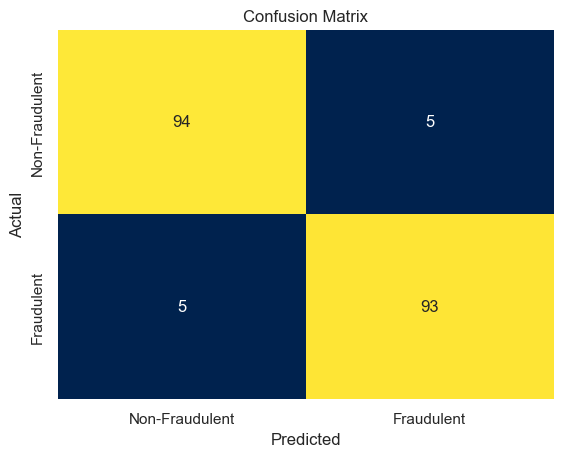

In [56]:
# Displaying the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_logit)
labels = ['Non-Fraudulent','Fraudulent']
sns.heatmap(cm, annot=True, cbar = False, cmap = 'cividis', fmt='d',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [57]:
# Cross Validation approach - K-Fold Method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_model, X_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_model, X_test, y_test, cv=10)
print("10-fold cross validation for Logistic Regression Model:\n")
print("Training 10-fold Cross Validation scores:\n",training_accuracy)
print()
print("Training Average Accuracy:", training_accuracy.mean())
print("*"*100)
print("Test 10-fold Cross Validation scores:\n",test_accuracy)
print()
print("Test Average Accuracy:", test_accuracy.mean())

10-fold cross validation for Logistic Regression Model:

Training 10-fold Cross Validation scores:
 [0.96202532 0.96202532 0.93670886 0.92405063 0.93670886 0.92405063
 0.97468354 0.8974359  0.96153846 0.94871795]

Training Average Accuracy: 0.9427945472249271
****************************************************************************************************
Test 10-fold Cross Validation scores:
 [0.95       0.9        0.95       0.85       0.95       1.
 0.95       0.94736842 0.94736842 0.89473684]

Test Average Accuracy: 0.9339473684210526


## Evaluate the model by AUPRC for Logistic Regression Model

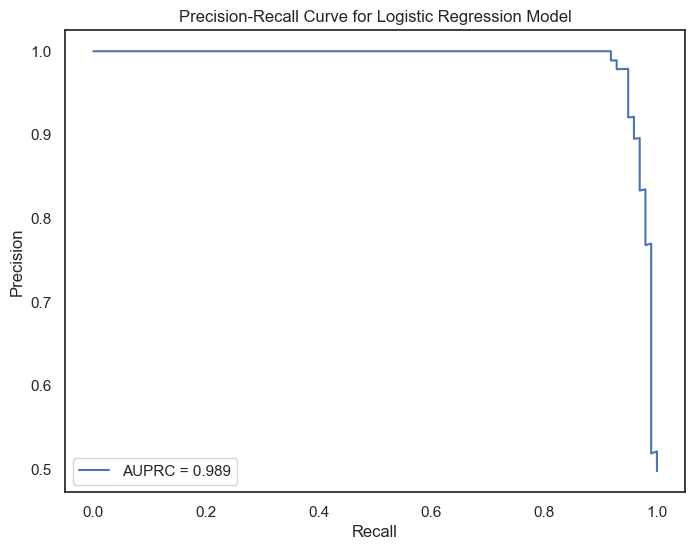

In [58]:
from sklearn.metrics import precision_recall_curve, auc

y_scores_logit = logit_model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

precision_final_logit, recall_final_logit, _= precision_recall_curve(y_test, y_scores_logit)
auprc_logit= auc(recall_final_logit, precision_final_logit)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_final_logit, precision_final_logit, label=f'AUPRC = {auprc_logit:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression Model')
plt.legend(loc='best')
plt.show()

## Model Training: Random Forest Classifier Model

In [59]:
# Importing RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Predicting the model on the training data
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

## Evaluate the Random Forest Classifier model

In [61]:
# Displaying the Accuracy score for train and test data
print("Training Accuracy Score :", accuracy_score(y_train, y_pred_train_rf))
print("*"*100)
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_test_rf))

Training Accuracy Score : 1.0
****************************************************************************************************
Test Accuracy Score : 0.9543147208121827


In [62]:
# Displaying the Classification Report
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_rf, target_names = ['Non-Fraudulent', 'Fraudulent']))
print("*"*100)
print("Test Classification Report:\n", classification_report(y_test, y_pred_test_rf, target_names = ['Non-Fraudulent', 'Fraudulent']))

Training Classification Report:
                 precision    recall  f1-score   support

Non-Fraudulent       1.00      1.00      1.00       393
    Fraudulent       1.00      1.00      1.00       394

      accuracy                           1.00       787
     macro avg       1.00      1.00      1.00       787
  weighted avg       1.00      1.00      1.00       787

****************************************************************************************************
Test Classification Report:
                 precision    recall  f1-score   support

Non-Fraudulent       0.94      0.97      0.96        99
    Fraudulent       0.97      0.94      0.95        98

      accuracy                           0.95       197
     macro avg       0.95      0.95      0.95       197
  weighted avg       0.95      0.95      0.95       197



**Result Understanding:**

- Getting Accuracy as 1, we can uderstand that because of large legit transations, the results are showing as 1
- The model is highly accurate overall but has room for improvement in recall for the "Fraudulent" class.
- Depending on the specific requirements and priorities, you might want to adjust the threshold to optimize for precision, recall, or another metric.
- From the above classification report of Precision, Recall and F1-Score, we confirmed that the data is not overfit or underfit
- Also, the model performs exceptionally well than Logistic Regression model in identifying "Non-Fraudulent" instances, achieving perfect precision, recall and f1-score.

In [63]:
# Calculating and displaying additional metrics
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
precision_rf = precision_score(y_test, y_pred_test_rf)
recall_rf = recall_score(y_test, y_pred_test_rf)
f1_score_rf = f1_score(y_test, y_pred_test_rf)

# Displaying the summary metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_score_rf)

Accuracy: 0.9543147208121827
Precision: 0.968421052631579
Recall: 0.9387755102040817
F1-Score: 0.9533678756476685


Text(0.5, 1.0, 'Confusion Matrix')

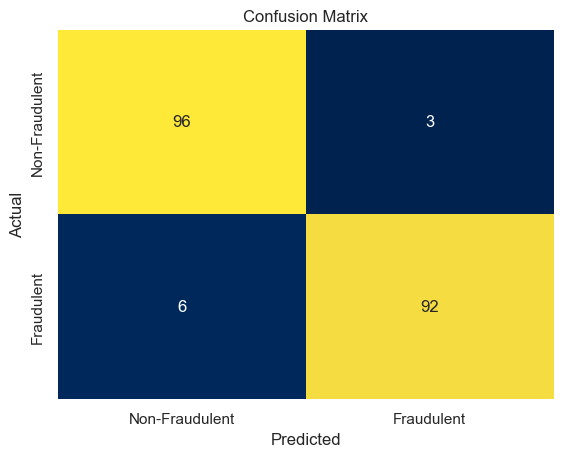

In [64]:
# Displaying the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_rf)
labels = ['Non-Fraudulent', 'Fraudulent']
sns.heatmap(cm, annot=True, cbar = False, cmap = 'cividis', fmt='g',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [65]:
# Cross Validation approach - K-Fold Method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf_model, X_train, y_train, cv=10)
test_accuracy = cross_val_score(rf_model, X_test, y_test, cv=10)
print("10-fold cross validation for Logistic Regression Model:\n")
print("Training 10-fold Cross Validation scores:\n",training_accuracy)
print()
print("Training Average Accuracy:", training_accuracy.mean())
print("*"*100)
print("Test 10-fold Cross Validation scores:\n",test_accuracy)
print()
print("Test Average Accuracy:", test_accuracy.mean())

10-fold cross validation for Logistic Regression Model:

Training 10-fold Cross Validation scores:
 [0.94936709 0.92405063 0.93670886 0.88607595 0.92405063 0.91139241
 0.97468354 0.91025641 0.97435897 0.94871795]

Training Average Accuracy: 0.9339662447257384
****************************************************************************************************
Test 10-fold Cross Validation scores:
 [0.95       0.9        0.95       1.         0.85       1.
 0.9        1.         0.94736842 0.94736842]

Test Average Accuracy: 0.9444736842105262


## Evaluate the model by AUPRC for Random Forest Classifier

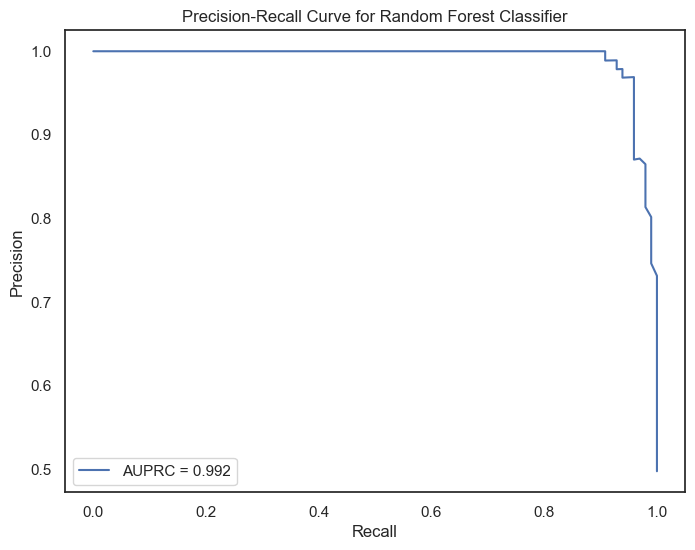

In [66]:
from sklearn.metrics import precision_recall_curve, auc

y_scores_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

precision_final_rf, recall_final_rf, _ = precision_recall_curve(y_test, y_scores_rf)
auprc_rf= auc(recall_final_rf, precision_final_rf)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_final_rf, precision_final_rf, label=f'AUPRC = {auprc_rf:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend(loc='best')
plt.show()

## Overall Performance of both the models by ROC and AUC Curve

In [67]:
# Display the ROC AUC Score for both the models
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, y_pred_test_logit)
print(f'ROC AUC Score for Logistic Regression: ',logit_roc_auc)
rf_roc_auc = roc_auc_score(y_test, y_pred_test_rf)
print(f'ROC AUC Score for Random Forest Classifier: ',rf_roc_auc)

ROC AUC Score for Logistic Regression:  0.9492372706658422
ROC AUC Score for Random Forest Classifier:  0.9542362399505258


In [68]:
# Display the true positive rate (TPR), the false positive rate (FPR) and threshold for Logistic Regression.
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_test_logit)
display(fpr1[:10])
display(tpr1[:10])
display(thresholds1[:10])

array([0.        , 0.05050505, 1.        ])

array([0.        , 0.94897959, 1.        ])

array([inf,  1.,  0.])

In [69]:
# Display the true positive rate (TPR), the false positive rate (FPR) and threshold for Random Forest Classifier
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_test_rf)
display(fpr2[:10])
display(tpr2[:10])
display(thresholds2[:10])

array([0.        , 0.03030303, 1.        ])

array([0.        , 0.93877551, 1.        ])

array([inf,  1.,  0.])

## Plotting ROC and AUC Curve

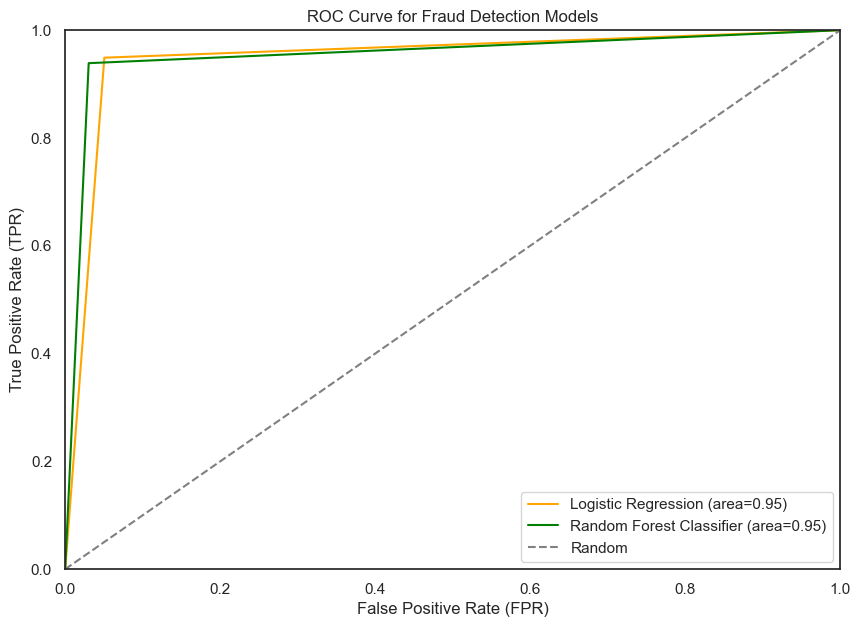

In [70]:
plt.figure(figsize=(10,7))
# Plotting ROC Curves for each model 
plt.plot(fpr1, tpr1, color='orange', label="Logistic Regression (area=%0.2f)" % logit_roc_auc)
plt.plot(fpr2, tpr2, color='green', label="Random Forest Classifier (area=%0.2f)" % rf_roc_auc)

# Layout adjustments
plt.plot([0,1],[0,1], 'k--', color='gray', label='Random')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title("ROC Curve for Fraud Detection Models")
plt.legend(loc='lower right')
plt.show()

- The ROC curves compare the performance of Logistic Regression and a Random Forest Classifier.
- Random Forest classifier outperform the Logistic Regression in distinguishing between classes.
- The area under the ROC curve (AUC) provides a quantitative measure of the model's discriminative ability.
- Consider the trade-off between false positives and true positives when selecting a model or threshold.

#### Accuracy score doesn't matter for this dataset, because the dataset is Imblanced, hence we can see f1-score for both the models.

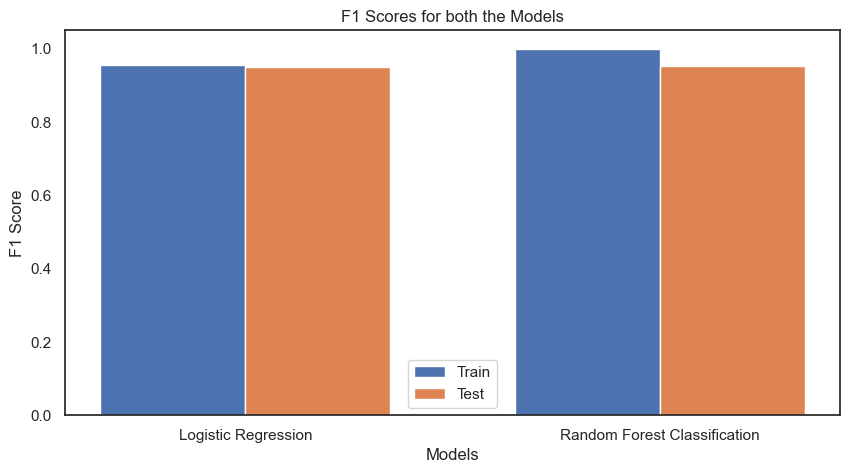

In [71]:
models = { 'Logistic Regression': logit_model, 'Random Forest Classification': rf_model, }

f1_scores = {'Train': {}, 'Test': {}}

# Loop through training each model on the training data and evaluating f1-score  
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred) 
        
    f1_scores['Train'][model_name] = train_f1
    f1_scores['Test'][model_name] = test_f1


# Plot F1 Scores
plt.figure(figsize=(10, 5))

bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, f1_scores['Train'].values(), bar_width, label='Train')
plt.bar(index + bar_width, f1_scores['Test'].values(), bar_width, label='Test')

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for both the Models')
plt.xticks(index + bar_width / 2, models.keys())
plt.legend()
plt.show()

In [72]:
#Comparing both the Model's performance using metrics - precision, recall, and F1-score
scores = {'LogisticRegression' : [f1_score_logit,precision_logit,recall_logit],
            'RandomForest' : [f1_score_rf,precision_rf,recall_rf]}

scores_df = pd.DataFrame(scores, index = ["f1_score",'precision_score','recall_score'])
print(scores_df)

                 LogisticRegression  RandomForest
f1_score                    0.94898      0.953368
precision_score             0.94898      0.968421
recall_score                0.94898      0.938776


## Summary:

- Performed both logistic regression and and Random Forest Classifier using scikit-learn, made predictions on a test set, and plotted the confusion matrix for evaluation.
- Both models (Logistic Regression and Random Forest Classifier) performed exceptionally well, but Random Forest Classifier have achieved high F1-score when compared to Logistic Regression model for both the classes which makes it the best model.
- High precision score indicates that the model is good at identifying positive examples, where the target variable is 1.
- High recall score indicates that the model is good at identifying positive examples, where the target variable is 0.
- High f1 score is also showing that the model is good at identifying positive and negative examples.
- ROC-AUC curve and Precision-Recall curve are two methods to decide the proper threshold values. They are also used to explain the model goodness of fit.

## Conclusion:

- Both models are effective in handling the classification task with high accuracy and balanced performance across classes. Random Forest classifier outperform the Logistic Regression in distinguishing between classes.
- Data is highly imbalanced, so it needs to be undersampling or oversampling technique. I choose to do UnderSampling technique to balance the data.
- The models show balanced performance in correctly identifying instances of both classes (0 and 1), as indicated by the similarity in f1 score and recall values.
- Precision for both classes are also high, suggesting a good balance between  and recall. But Precision for Random Forest Classifier is more than compared to Precision of Logistic Regression.
- AUC-ROC is less sensitive to class imbalance than AUC-PR. In an imbalanced dataset, where one class is much more prevalent than the other, the ROC curve may look good even if the classifier is performing poorly on the minority class.
- Depending on the specific requirements of the problem (e.g., the importance of false positives vs. false negatives), you may choose one model over the other based on the balance between precision and recall.
- Consider the context of application and certain misclassifications which may tend to high cost than others when selecting a final model.
- Further analysis, such as feature importance or exploring additional evaluation metrics, could provide additional insights into the model's behavior and help in making a more informed decision.